# Comparación del rendimiento de los diferentes escaladores
## Prueba 1 - Un único campeonato

Es un pequeño experimento, no vamos a entrar en detalle. Extender si acierto.

In [128]:
# Importamos librerias, pandas para manejo de datos, json y urllib
# para descargar los dataset de la IFSC

import pandas as pd
import urllib.request, json
import matplotlib.pyplot as plt

In [32]:
# Descargamos dataset del campeonato a evaluar
url = "https://ifsc.egroupware.net/egw/ranking/json.php?comp=8322" 

with urllib.request.urlopen(url) as url:
    data = json.loads(url.read().decode())

In [33]:
pd.io.json.json_normalize(data)

,WetId,name,rkey,display_athlete,duration,date_end,date_span,date,categorys,competitions,expires,etag
0,8322,IFSC Combined Qualifier - Toulouse/Tournefeuil...,19_W2,nation,4,2019-12-01,28 November - 1 December 2019,2019-11-28,"[{'GrpId': '42', 'name': 'WOMEN combined', 'rk...","[{'WetId': '8322', 'name': 'IFSC Combined Qual...",300,"""db6096fb2e036b1973928b8c6847842c"""


In [34]:
pd.io.json.json_normalize(data['categorys'])

,GrpId,name,rkey,url,results
0,42,WOMEN combined,ICC_FX,https://www.ifsc-climbing.org/index.php/world-...,"[{'result_rank': '1', 'PerId': '60150', 'first..."
1,45,MEN combined,ICC_MX,https://www.ifsc-climbing.org/index.php/world-...,"[{'result_rank': '1', 'PerId': '10172', 'first..."


In [38]:
women = pd.io.json.json_normalize(data['categorys'][0]['results'])
women

,result_rank,PerId,firstname,lastname,birthyear,nation,fed_id,federation,city,fed_url,url
0,1,60150,Futaba,Ito,2002,JPN,62,Japan Mountaineering & Sport Climbing Association,"Morioka-shi, Iwate",http://www.jma-sangaku.or.jp/,https://www.ifsc-climbing.org/index.php?option...
1,2,9984,Julia,Chanourdie,1996,FRA,6,Federation Française de la Montagne et de l'Es...,AVIERNOZ,http://www.ffme.fr,https://www.ifsc-climbing.org/index.php?option...
2,3,13209,Mia,Krampl,2000,SLO,19,Alpine Association of Slovenia,Golnik,http://www.pzs.si/ksp,https://www.ifsc-climbing.org/index.php?option...
3,4,13208,Lucka,Rakovec,2001,SLO,19,Alpine Association of Slovenia,Ljubljana,http://www.pzs.si/ksp,https://www.ifsc-climbing.org/index.php?option...
4,5,66821,Ai,Mori,2003,JPN,62,Japan Mountaineering & Sport Climbing Association,"Tsukuba-shi, Ibaraki",http://www.jma-sangaku.or.jp/,https://www.ifsc-climbing.org/index.php?option...
5,6,10857,Iuliia,Kaplina,1993,RUS,2,Climbing Federation of Russia,Tyumen,http://www.c-f-r.ru,https://www.ifsc-climbing.org/index.php?option...
6,7,11374,Kyra,Condie,1996,USA,39,USA Climbing,Shoreview,http://www.usaclimbing.org,https://www.ifsc-climbing.org/index.php?option...
7,8,13189,Laura,Rogora,2001,ITA,15,Federazione Italiana Arrampicata Sportiva,Roma,http://www.federclimb.it/,https://www.ifsc-climbing.org/index.php?option...


In [39]:
men = pd.io.json.json_normalize(data['categorys'][1]['results'])
men

,result_rank,PerId,firstname,lastname,birthyear,nation,fed_id,federation,city,fed_url,url
0,1,10172,Kokoro,Fujii,1992,JPN,62,Japan Mountaineering & Sport Climbing Association,"Kiyose,Tokyo",http://www.jma-sangaku.or.jp/,https://www.ifsc-climbing.org/index.php?option...
1,2,8372,Adam,Ondra,1993,CZE,29,Cesky Horolezecky Svaz,Brno,http://www.horosvaz.cz/,https://www.ifsc-climbing.org/index.php?option...
2,3,12432,Meichi,Narasaki,1999,JPN,62,Japan Mountaineering & Sport Climbing Association,"Utsunomiya, Tochigi",http://www.jma-sangaku.or.jp/,https://www.ifsc-climbing.org/index.php?option...
3,4,6,Bassa,Mawem,1984,FRA,6,Federation Française de la Montagne et de l'Es...,Clermont Ferrand,http://www.ffme.fr,https://www.ifsc-climbing.org/index.php?option...
4,5,6623,Jan,Hojer,1992,GER,1,Deutscher Alpenverein,Frechen,http://www.alpenverein.de,https://www.ifsc-climbing.org/index.php?option...
5,6,12940,YuFei,Pan,2000,CHN,151,Chinese Mountaineering Association,Beijing,http://cmasports.sport.org.cn,https://www.ifsc-climbing.org/index.php?option...
6,7,56609,Alberto,Ginés López,2002,ESP,11,Federación Española de Deportes de Montaña y E...,Cáceres,http://www.fedme.es,https://www.ifsc-climbing.org/index.php?option...
7,8,12601,Nathaniel,Coleman,1997,USA,39,USA Climbing,Murray,http://www.usaclimbing.org,https://www.ifsc-climbing.org/index.php?option...


## Comparación entre participantes

Vistos los resultados generales, antes de desglosar por pruebas, vamos a consultar las puntuaciones en otras competiciones por fechas para cada deportista.

In [46]:
# Descargamos los datos de cada participante en una lista

person = list()
for per in women['PerId']:
    url = "https://ifsc.egroupware.net/egw/ranking/json.php?person=%i" %int(per)
    with urllib.request.urlopen(url) as url:
        person.append(json.loads(url.read().decode()))

In [126]:
# Reagrupamos en una única matriz
ds = list()
df = pd.DataFrame(columns = ['rank', 'date', 'name', 'url', 'WetId', 'cat_name', 'GrpId', 'PerId'])
for per in person:
    temp = pd.io.json.json_normalize(per['results'])
    temp['rank'] = temp['rank'].astype(int)
    temp['date'] = pd.to_datetime(temp['date'])
    temp['PerId'] = per['PerId']
    ds.append(temp)
df = pd.concat(ds)

PerId
10857    AxesSubplot(0.125,0.2;0.775x0.68)
11374    AxesSubplot(0.125,0.2;0.775x0.68)
13189    AxesSubplot(0.125,0.2;0.775x0.68)
13208    AxesSubplot(0.125,0.2;0.775x0.68)
13209    AxesSubplot(0.125,0.2;0.775x0.68)
60150    AxesSubplot(0.125,0.2;0.775x0.68)
66821    AxesSubplot(0.125,0.2;0.775x0.68)
9984     AxesSubplot(0.125,0.2;0.775x0.68)
Name: rank, dtype: object

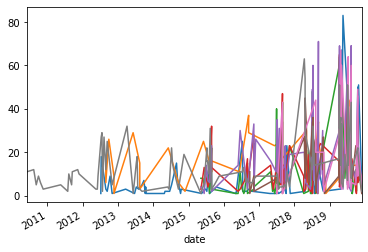

In [127]:
df.set_index('date', inplace=True)
df.groupby('PerId')['rank'].plot(figsize=(20,10))

PerId
10857    AxesSubplot(0.125,0.2;0.775x0.68)
11374    AxesSubplot(0.125,0.2;0.775x0.68)
13189    AxesSubplot(0.125,0.2;0.775x0.68)
13208    AxesSubplot(0.125,0.2;0.775x0.68)
13209    AxesSubplot(0.125,0.2;0.775x0.68)
60150    AxesSubplot(0.125,0.2;0.775x0.68)
66821    AxesSubplot(0.125,0.2;0.775x0.68)
9984     AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

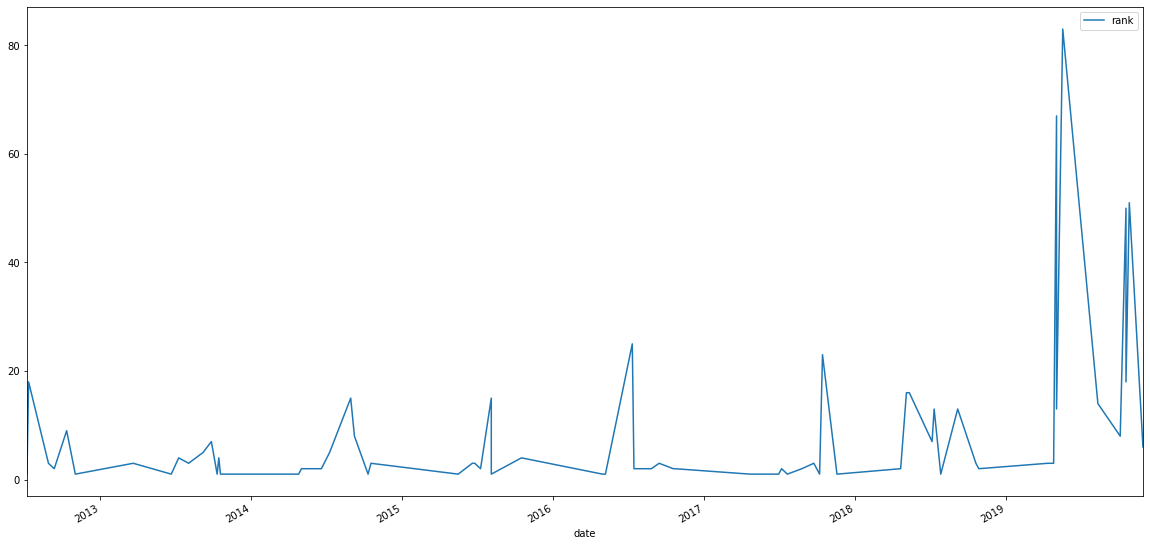

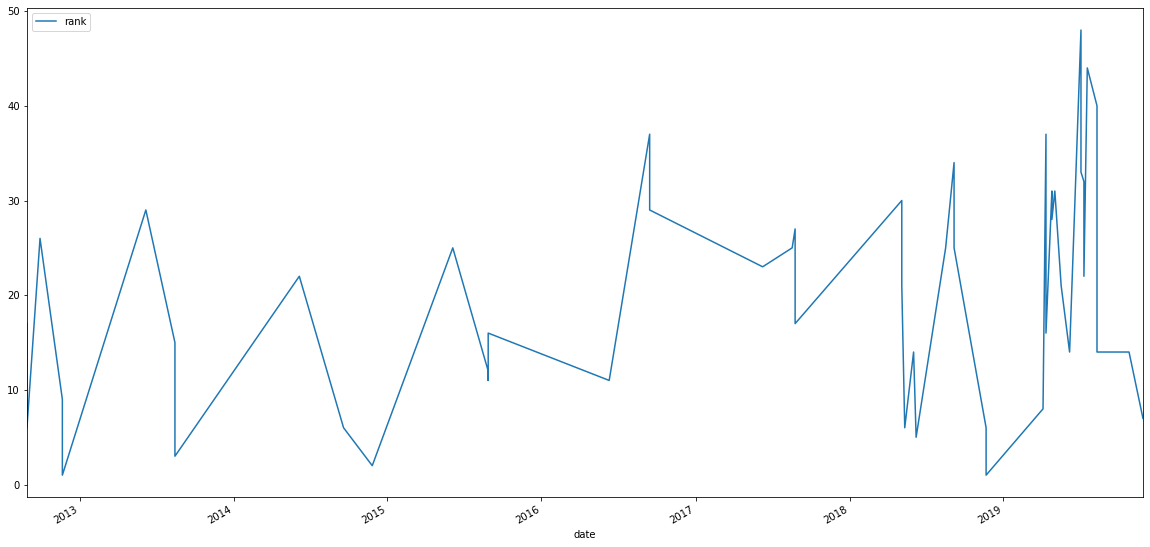

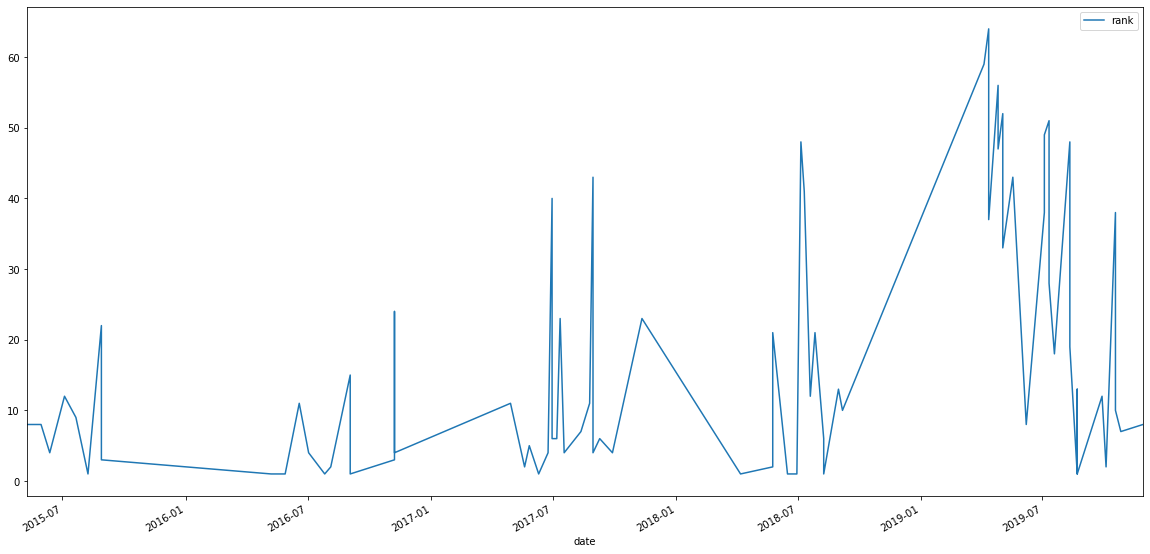

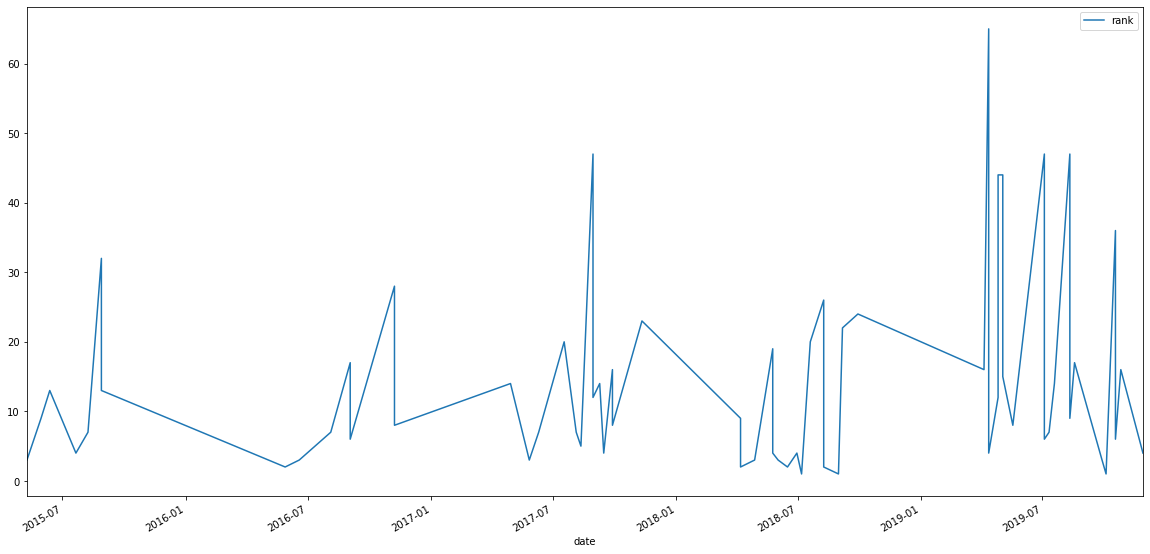

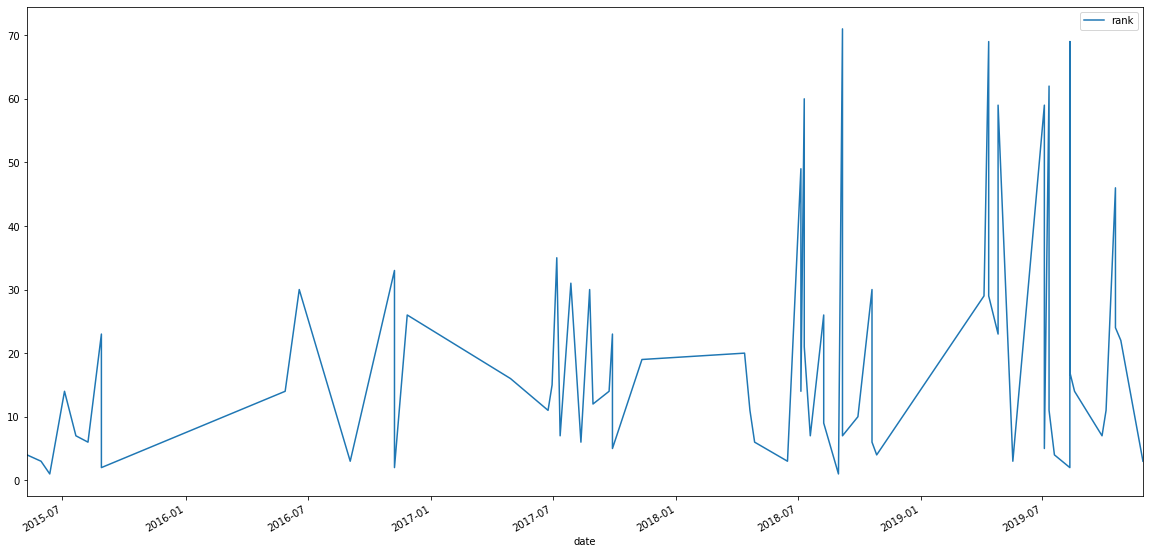

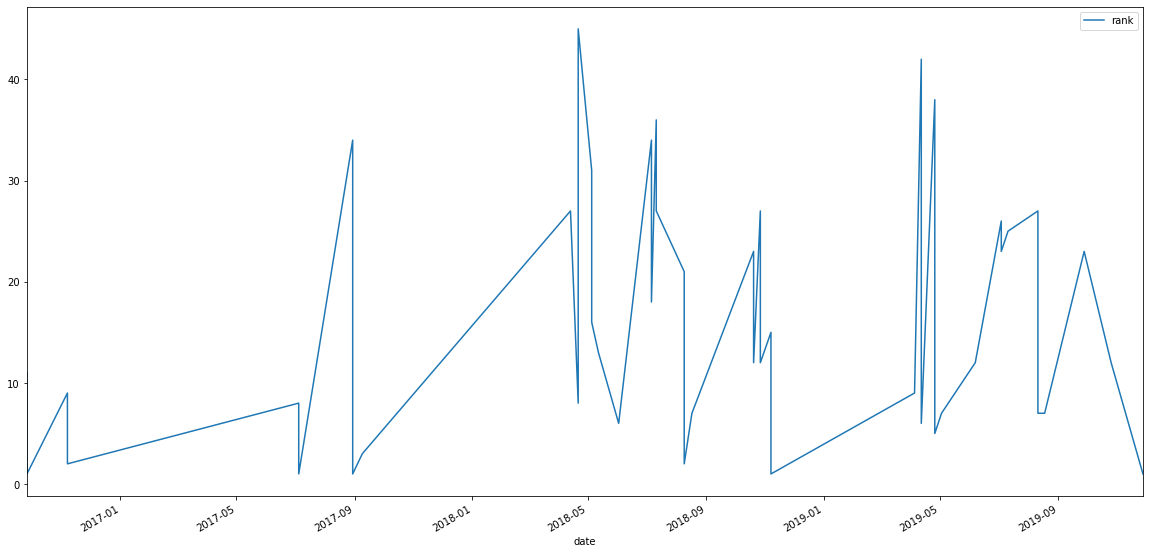

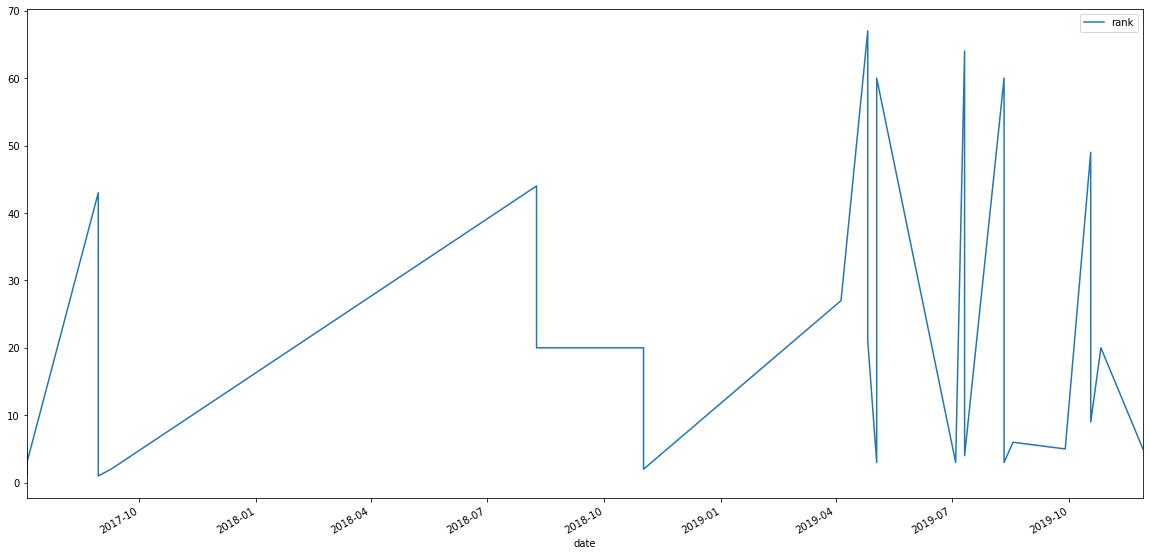

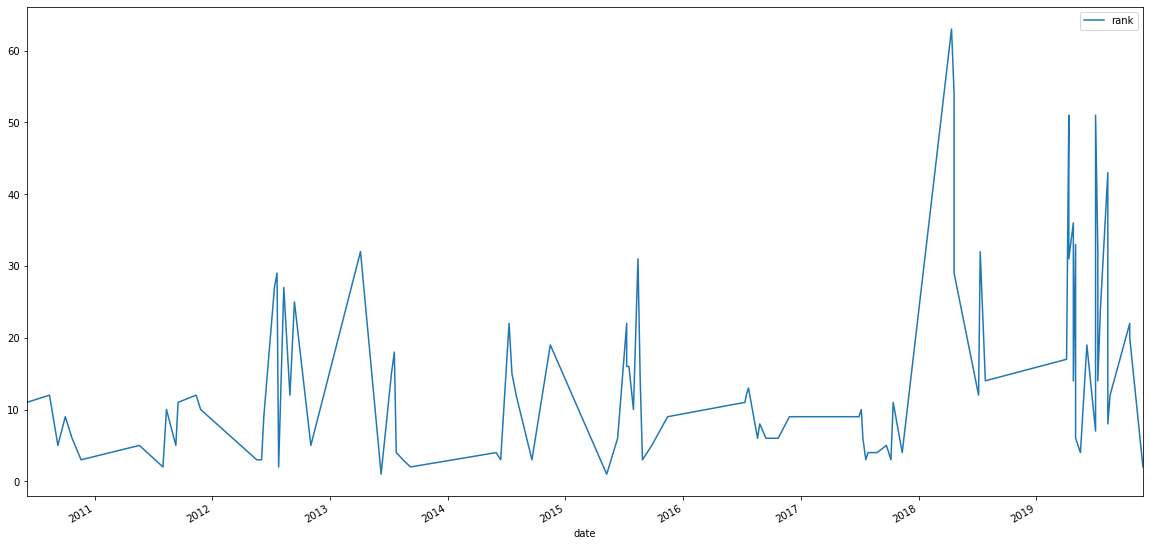

In [138]:
df.groupby('PerId').plot(y= 'rank', figsize=(20,10))